# Task 3: Non-Linear Curve Fitting

Members: Lars Olav Thorbjørnsen, Stein Are Årsnes og Sanjai Vijayaratnam

### Abstract

### Introduction

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score  

#### 3.1

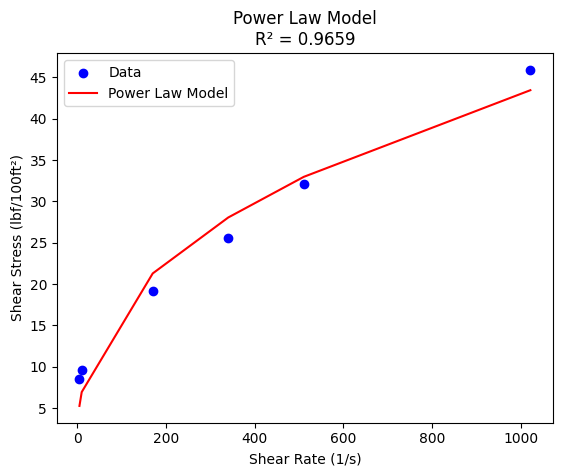

Power Law Model Parameters: [2.75356261 0.39811263]
Power Law Model R²: 0.9658861828739901




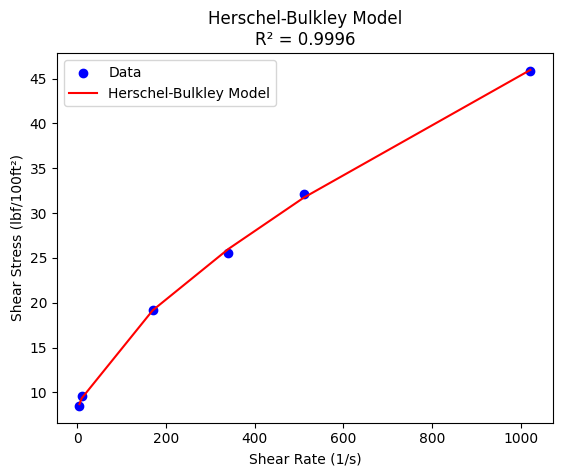

Herschel-Bulkley Model Parameters: [0.3712281  0.66935514 7.59810823]
Herschel-Bulkley Model R²: 0.9996064451715285




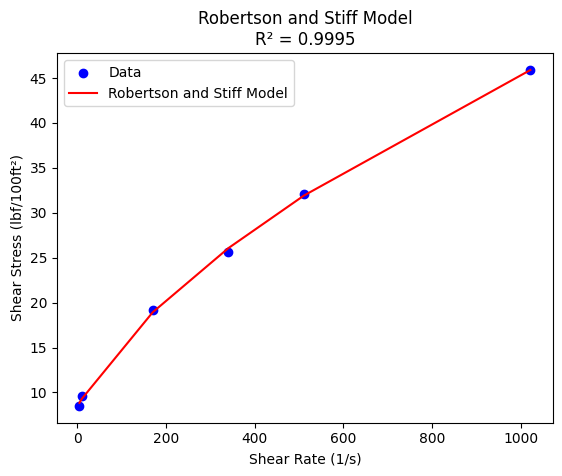

Robertson and Stiff Model Parameters: [ 0.90003157 52.67489453  0.56329938]
Robertson and Stiff Model R²: 0.9994670494050243




In [2]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

shear_rate = np.array([5.1, 10.2, 170.3, 340.6, 510.9, 1021.8])  # X values
shear_stress = np.array([8.5, 9.6, 19.2, 25.6, 32.1, 45.9])       # Y values

def power_law(x, a, b):
    return a * x**b

def herschel_bulkley(x, a, b, c):
    return a * x**b + c

def robertson_stiff(x, a, b, c):
    return a * (x + b)**c

def fit_and_plot(model_func, x, y, initial_params, title):
    popt, _ = curve_fit(model_func, x, y, p0=initial_params)
    
    y_model = model_func(x, *popt)
    
    r2 = r2_score(y, y_model)
    
    plt.figure()
    plt.scatter(x, y, label="Data", color="blue")
    plt.plot(x, y_model, label=f"{title} Model", color="red")
    plt.title(f"{title} Model\nR² = {r2:.4f}")
    plt.xlabel("Shear Rate (1/s)")
    plt.ylabel("Shear Stress (lbf/100ft²)")
    plt.legend()
    plt.show()
    
    print(f"{title} Model Parameters:", popt)
    print(f"{title} Model R²:", r2)
    print("\n")

fit_and_plot(power_law, shear_rate, shear_stress, [1, 1], "Power Law")
fit_and_plot(herschel_bulkley, shear_rate, shear_stress, [1, 1, 1], "Herschel-Bulkley")
fit_and_plot(robertson_stiff, shear_rate, shear_stress, [1, 1, 1], "Robertson and Stiff")

#### 3.2

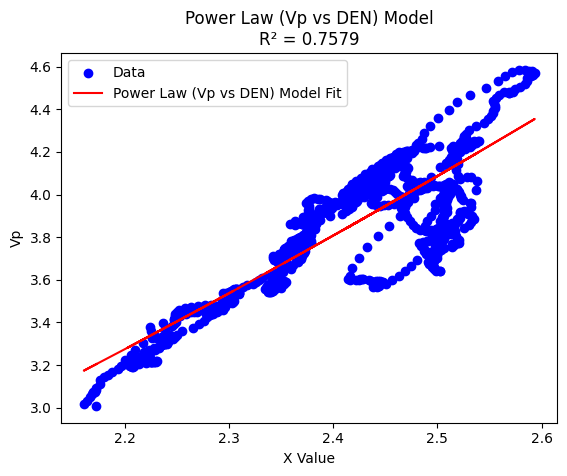

Power Law (Vp vs DEN) Model Parameters: [0.83632805 1.73130143]
Power Law (Vp vs DEN) Model R²: 0.7579363665252637




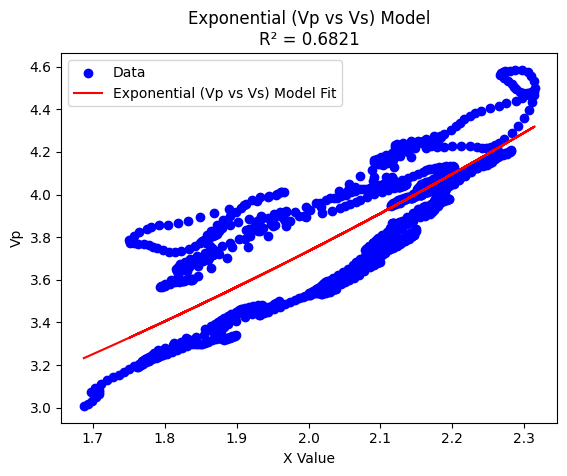

Exponential (Vp vs Vs) Model Parameters: [1.4833425  0.46169344]
Exponential (Vp vs Vs) Model R²: 0.6821331485053261




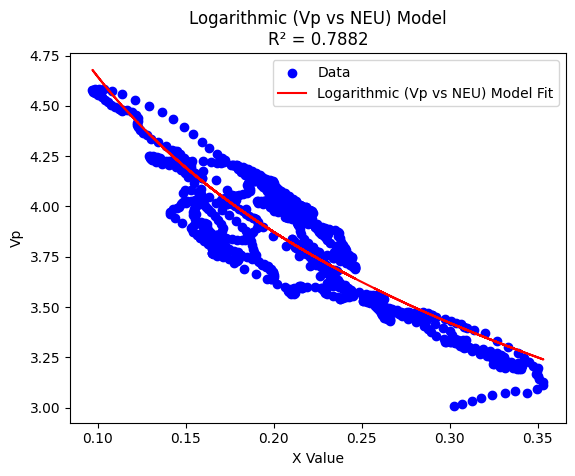

Logarithmic (Vp vs NEU) Model Parameters: [-1.11447574  2.07983242]
Logarithmic (Vp vs NEU) Model R²: 0.7881984431663592




In [3]:
df = pd.read_excel('CleanedFeatureSelectedFiltered.xlsx')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

def exponential_func(x, a, b):
    return a * np.exp(b * x)

def power_law_func(x, a, b):
    return a * x**b

def logarithmic_func(x, a, b):
    return a * np.log(x) + b

def fit_and_plot_mapping(x, y, model_func, initial_params, title):
    plt.scatter(x, y, label="Data", color="blue")
    
    popt, _ = curve_fit(model_func, x, y, p0=initial_params)
    y_model = model_func(x, *popt)
    
    r2 = r2_score(y, y_model)
    
    plt.plot(x, y_model, color="red", label=f"{title} Model Fit")
    plt.title(f"{title} Model\nR² = {r2:.4f}")
    plt.xlabel("X Value")
    plt.ylabel("Vp")
    plt.legend()
    plt.show()
    
    print(f"{title} Model Parameters:", popt)
    print(f"{title} Model R²:", r2)
    print("\n")

fit_and_plot_mapping(df['DEN'], df['Vp'], power_law_func, [1, 1], "Power Law (Vp vs DEN)")

fit_and_plot_mapping(df['Vs'], df['Vp'], exponential_func, [1, 0.1], "Exponential (Vp vs Vs)")

fit_and_plot_mapping(df['NEU'], df['Vp'], logarithmic_func, [1, 1], "Logarithmic (Vp vs NEU)")

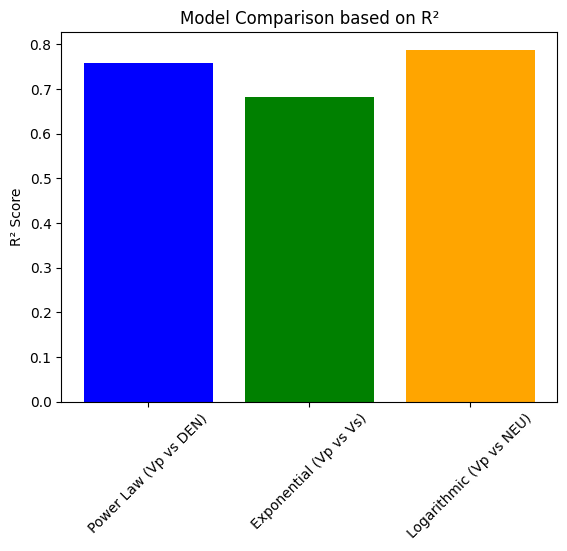

In [4]:
model_r2_scores = {
    "Power Law (Vp vs DEN)": 0.7579363665252637,
    "Exponential (Vp vs Vs)": 0.6821331485053261,
    "Logarithmic (Vp vs NEU)": 0.7881984431663592
}

plt.figure()
plt.bar(model_r2_scores.keys(), model_r2_scores.values(), color=['blue', 'green', 'orange'])
plt.ylabel("R² Score")
plt.title("Model Comparison based on R²")  
plt.xticks(rotation=45)
plt.show()


### Reflections

### Conclusion

### References